# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
data.pivot_table(index='children', values='debt', aggfunc='count')
# создание сводной таблицы методом pivot_table()

,debt
children,
0,14091
1,4808
2,2052
3,330
4,41
5,9


В данной выборке очень мало клиентов с тремя и более детьми. Для корректного сравнения показателей между группами можно объединить семьи с одним ребёнком в одну категорию с многодетными семьями. Разделим всех клиентов на *2 группы (с детьми и без детей)*.

In [23]:
data['children_category'] = data['children'].apply(lambda x: 'нет детей' if (x == 0) else 'есть дети')
# применение лямбда-функции для категоризации 

In [24]:
children_category_data = data.pivot_table(index='children_category', values='debt', aggfunc=['count', 'sum', 'mean'])
# создание сводной таблицы методом pivot_table()
children_category_data = children_category_data.round(3)
# округление количественных переменных в таблице children_category_data
children_category_data

,count,sum,mean
,debt,debt,debt
children_category,,,
есть дети,7240,669,0.092
нет детей,14091,1063,0.075


Text(0.5, 1.0, 'Доля клиентов с задолженностью по кредитам')

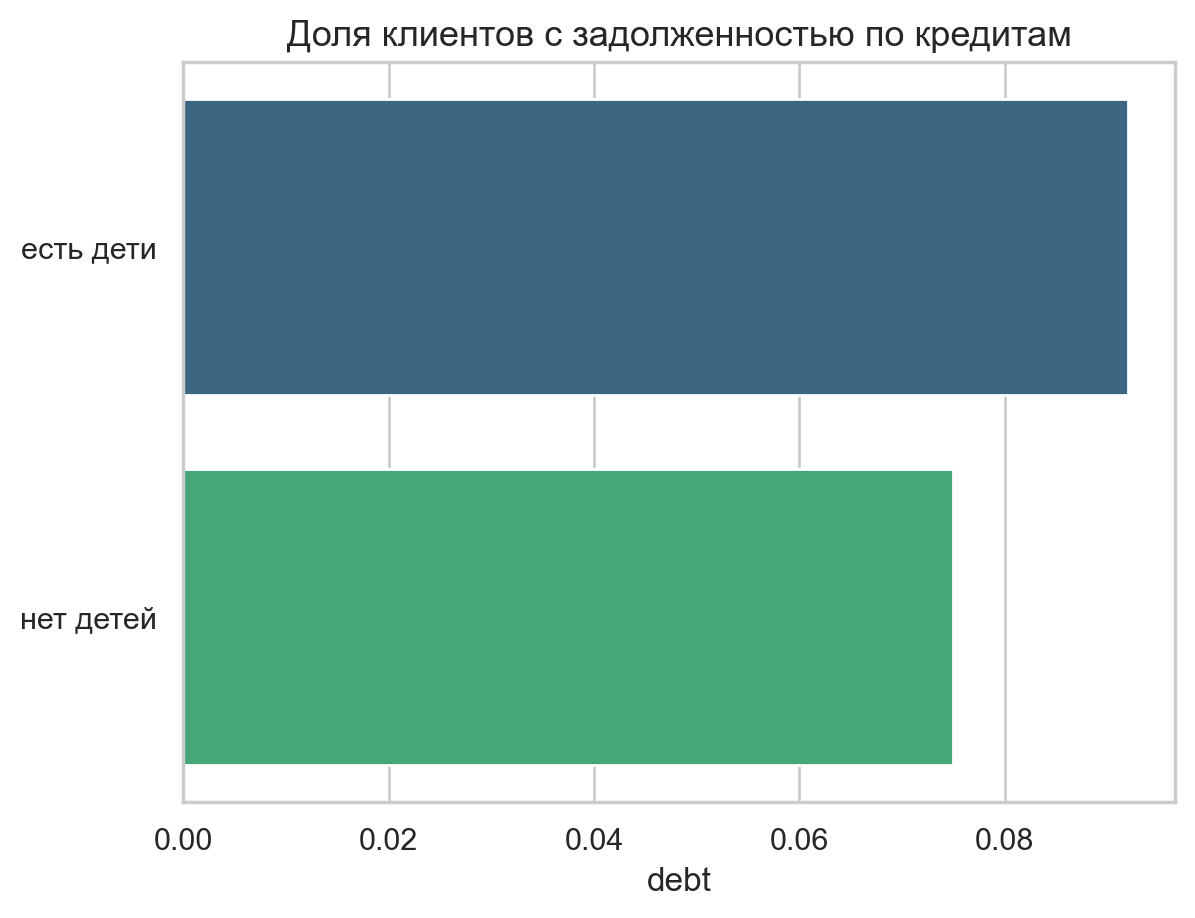

In [25]:
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
# настройка стиля и контекста графиков
sns.barplot(y=children_category_data.index, x=children_category_data['mean']['debt'], orient='h', palette='viridis')
plt.ylabel(None)
plt.title('Доля клиентов с задолженностью по кредитам', fontsize=13)
# построение столбчатой диаграммы

**Вывод:** 

Клиенты банка, у которых в семье **нет детей**, возвращают кредиты чаще, чем семьи с детьми. Доля должников среди них составляет всего **0.075**. Чем больше детей людям приходится обеспечивать, тем выше вероятность наличия у них в будущем задолженности по возврату кредитов.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
family_status_data = data.pivot_table(index='family_status', values='debt', aggfunc=['count', 'sum', 'mean'])
# создание сводной таблицы методом pivot_table()
family_status_data = family_status_data.round(3)
# округление количественных переменных в таблице family_status_data
family_status_data

,count,sum,mean
,debt,debt,debt
family_status,,,
Не женат / не замужем,2796,273,0.098
в разводе,1189,84,0.071
вдовец / вдова,951,63,0.066
гражданский брак,4134,385,0.093
женат / замужем,12261,927,0.076


Text(0.5, 1.0, 'Доля клиентов с задолженностью по кредитам')

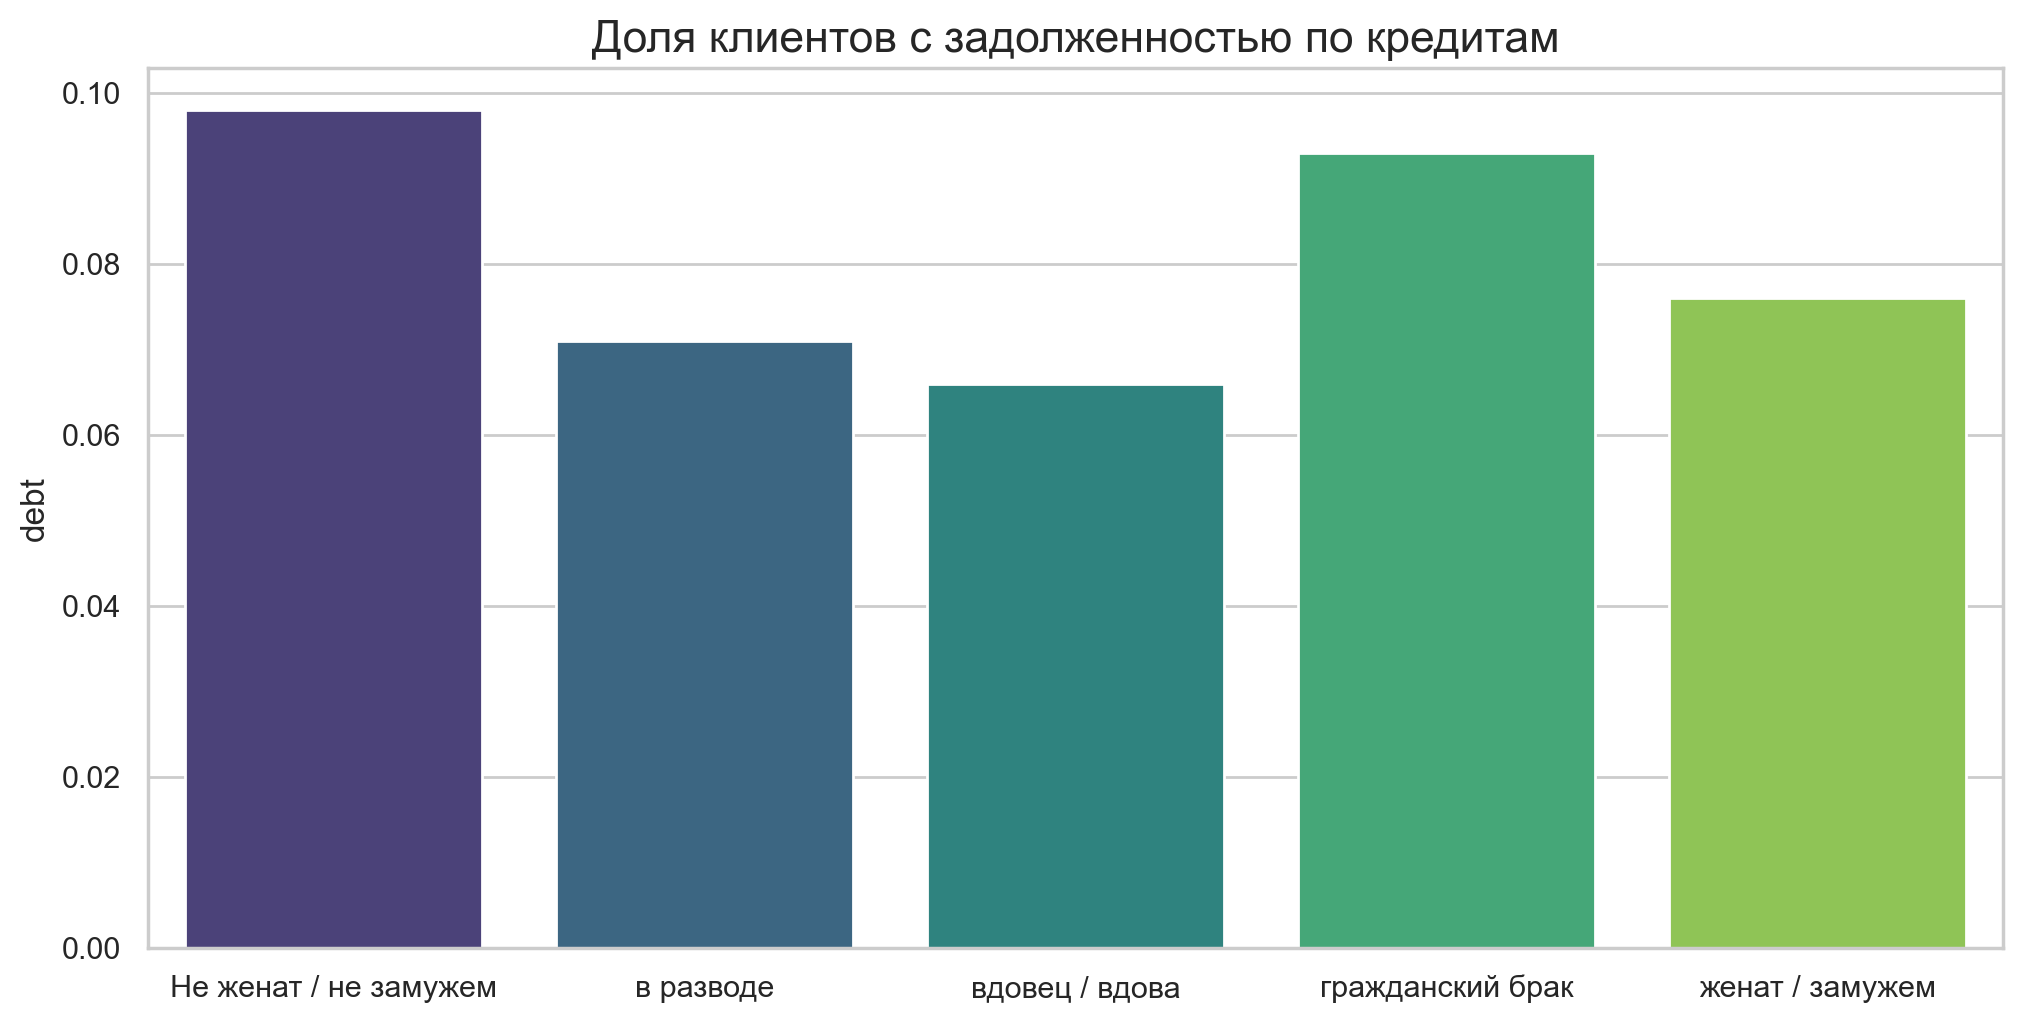

In [27]:
fg = plt.figure(figsize=(10,5), constrained_layout=True)
# создание объекта Figure
sns.barplot(x=family_status_data.index, y=family_status_data['mean']['debt'], palette='viridis')
plt.xlabel(None)
plt.title('Доля клиентов с задолженностью по кредитам', fontsize=16)
# построение столбчатой диаграммы

**Вывод:** 

Клиенты банка, состоящие **в официальном браке**, выплачивают кредиты лучше не женатых/не замужних людей, а также тех, кто находится в гражданском браке. Семейные пары скорее всего не станут рисковать и брать неподъёмный для себя кредит, ответственно расчитывая свой бюджет заранее. Доля **вдовцов/вдов** и людей **в разводе** как должников тоже низка и составляет **0.065 и 0.071** соответственно. Также можно предположить неявную зависимость с возрастом: молодые люди чаще находятся в гражданском браке либо не женаты/не замужем. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
total_income_data = data.pivot_table(index='total_income_category', values='debt', aggfunc=['count', 'sum', 'mean'])
# создание сводной таблицы методом pivot_table()
total_income_data = total_income_data.round(3)
# округление количественных переменных в таблице total_income_data
total_income_data

,count,sum,mean
,debt,debt,debt
total_income_category,,,
A,25,2,0.080
B,5014,354,0.071
C,15921,1353,0.085
D,349,21,0.060
E,22,2,0.091


Категории 'A', 'D' и 'E' содержат очень мало значений относительно других уровней дохода. Для выявления зависимости оставим в таблице только две категории 'B' и 'C' с достаточным числом клиентов. Категория 'C' включает клиентов с ежемесячным доходом от 50001 до 200000 руб., категория 'B' - от 200001 до 1000000 руб.

In [29]:
total_income_data = (data
                     .query('total_income_category not in ["A", "D", "E"]')
                     .pivot_table(index='total_income_category', values='debt', aggfunc=['count', 'sum', 'mean'])
                    ) 
# создание сводной таблицы методом pivot_table()
total_income_data = total_income_data.round(3)
# округление количественных переменных в таблице total_income_data
total_income_data

,count,sum,mean
,debt,debt,debt
total_income_category,,,
B,5014,354,0.071
C,15921,1353,0.085


Text(0.5, 1.0, 'Доля клиентов с задолженностью по кредитам')

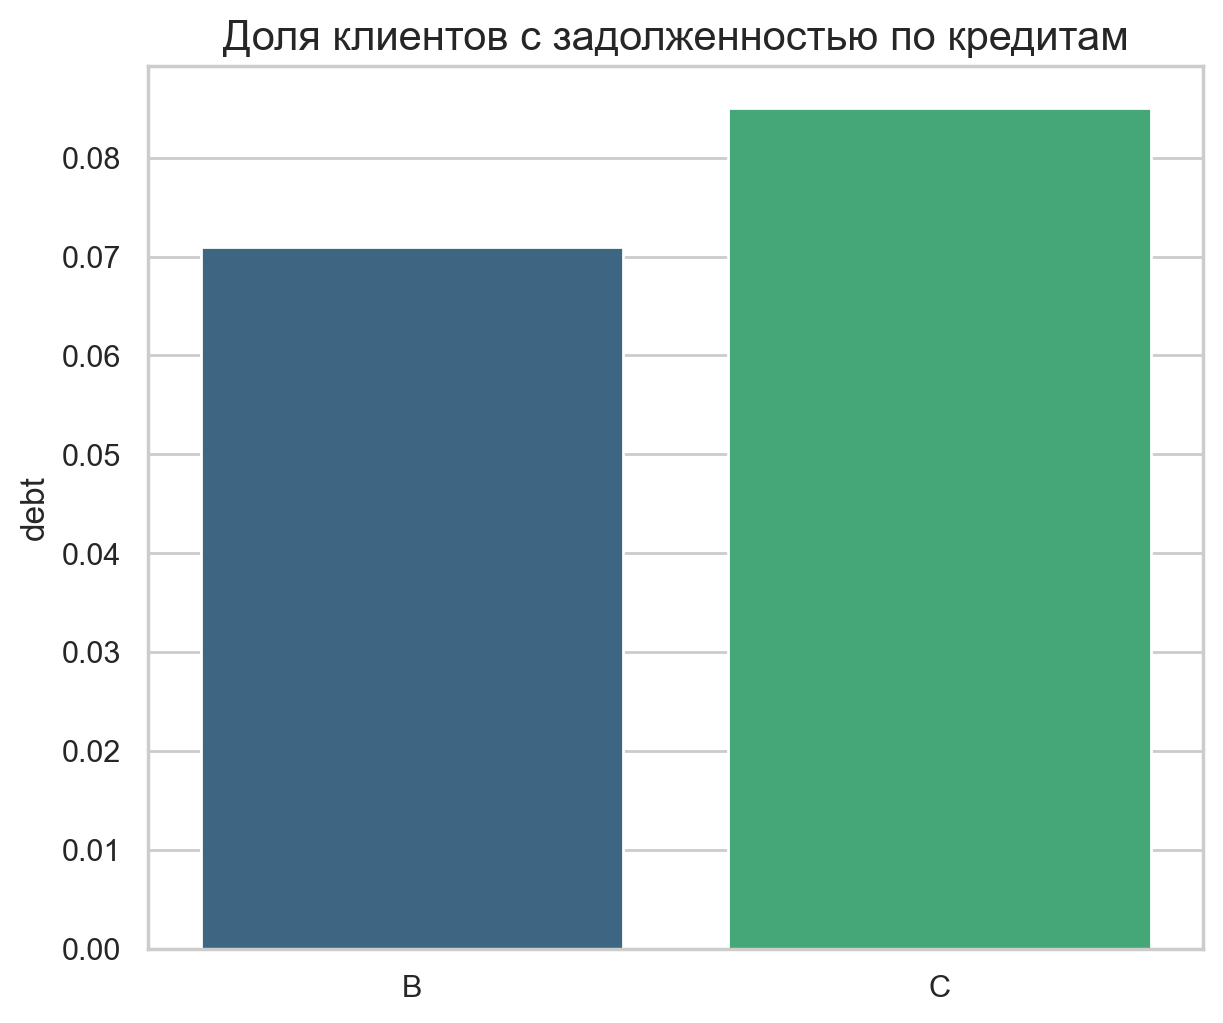

In [30]:
fg = plt.figure(figsize=(6,5), constrained_layout=True)
sns.barplot(x=total_income_data.index, y=total_income_data['mean']['debt'], palette='viridis')
plt.xlabel(None)
plt.title('Доля клиентов с задолженностью по кредитам', fontsize=15)
# построение столбчатой диаграммы

**Вывод:**

Чаще других задолженность по возврату кредитов имеют клиенты из категории 'C'. Самая низкая доля должников относится к **категории 'B' - 0.071**. Из графика выше следует, что группа клиентов с более высоким ежемесячным доходом имеет возможность чаще выплачивать свои кредиты. Однако, говорить о прямой зависимости между ежемесячным доходом и возвратом кредита в срок нельзя, так как в выборке не хватает данных по другим категориям.

Посмотрим как доля должников зависит от типа занятости на разных уровнях доходов, добавим в таблицу группировку по столбцу `income_type`.

In [31]:
income_type_data = (data
                    .query('total_income_category not in ["A", "D", "E"]')
                    .groupby(by=['total_income_category', 'income_type'])['debt'].mean().reset_index()
                   )
# группировка данных
income_type_data

,total_income_category,income_type,debt
0,B,безработный,0.000000
1,B,госслужащий,0.049180
2,B,компаньон,0.062897
3,B,пенсионер,0.056159
4,B,предприниматель,0.000000
5,B,сотрудник,0.083051
6,C,безработный,1.000000
7,C,в декрете,1.000000
8,C,госслужащий,0.063208
9,C,компаньон,0.080049


In [32]:
data['income_type'].value_counts()
# количество уникальных совпадений в колонке 'income_type'

сотрудник          11015
компаньон           5047
пенсионер           3812
госслужащий         1451
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Text(0.5, 1.0, 'Доля клиентов с задолженностью по кредитам')

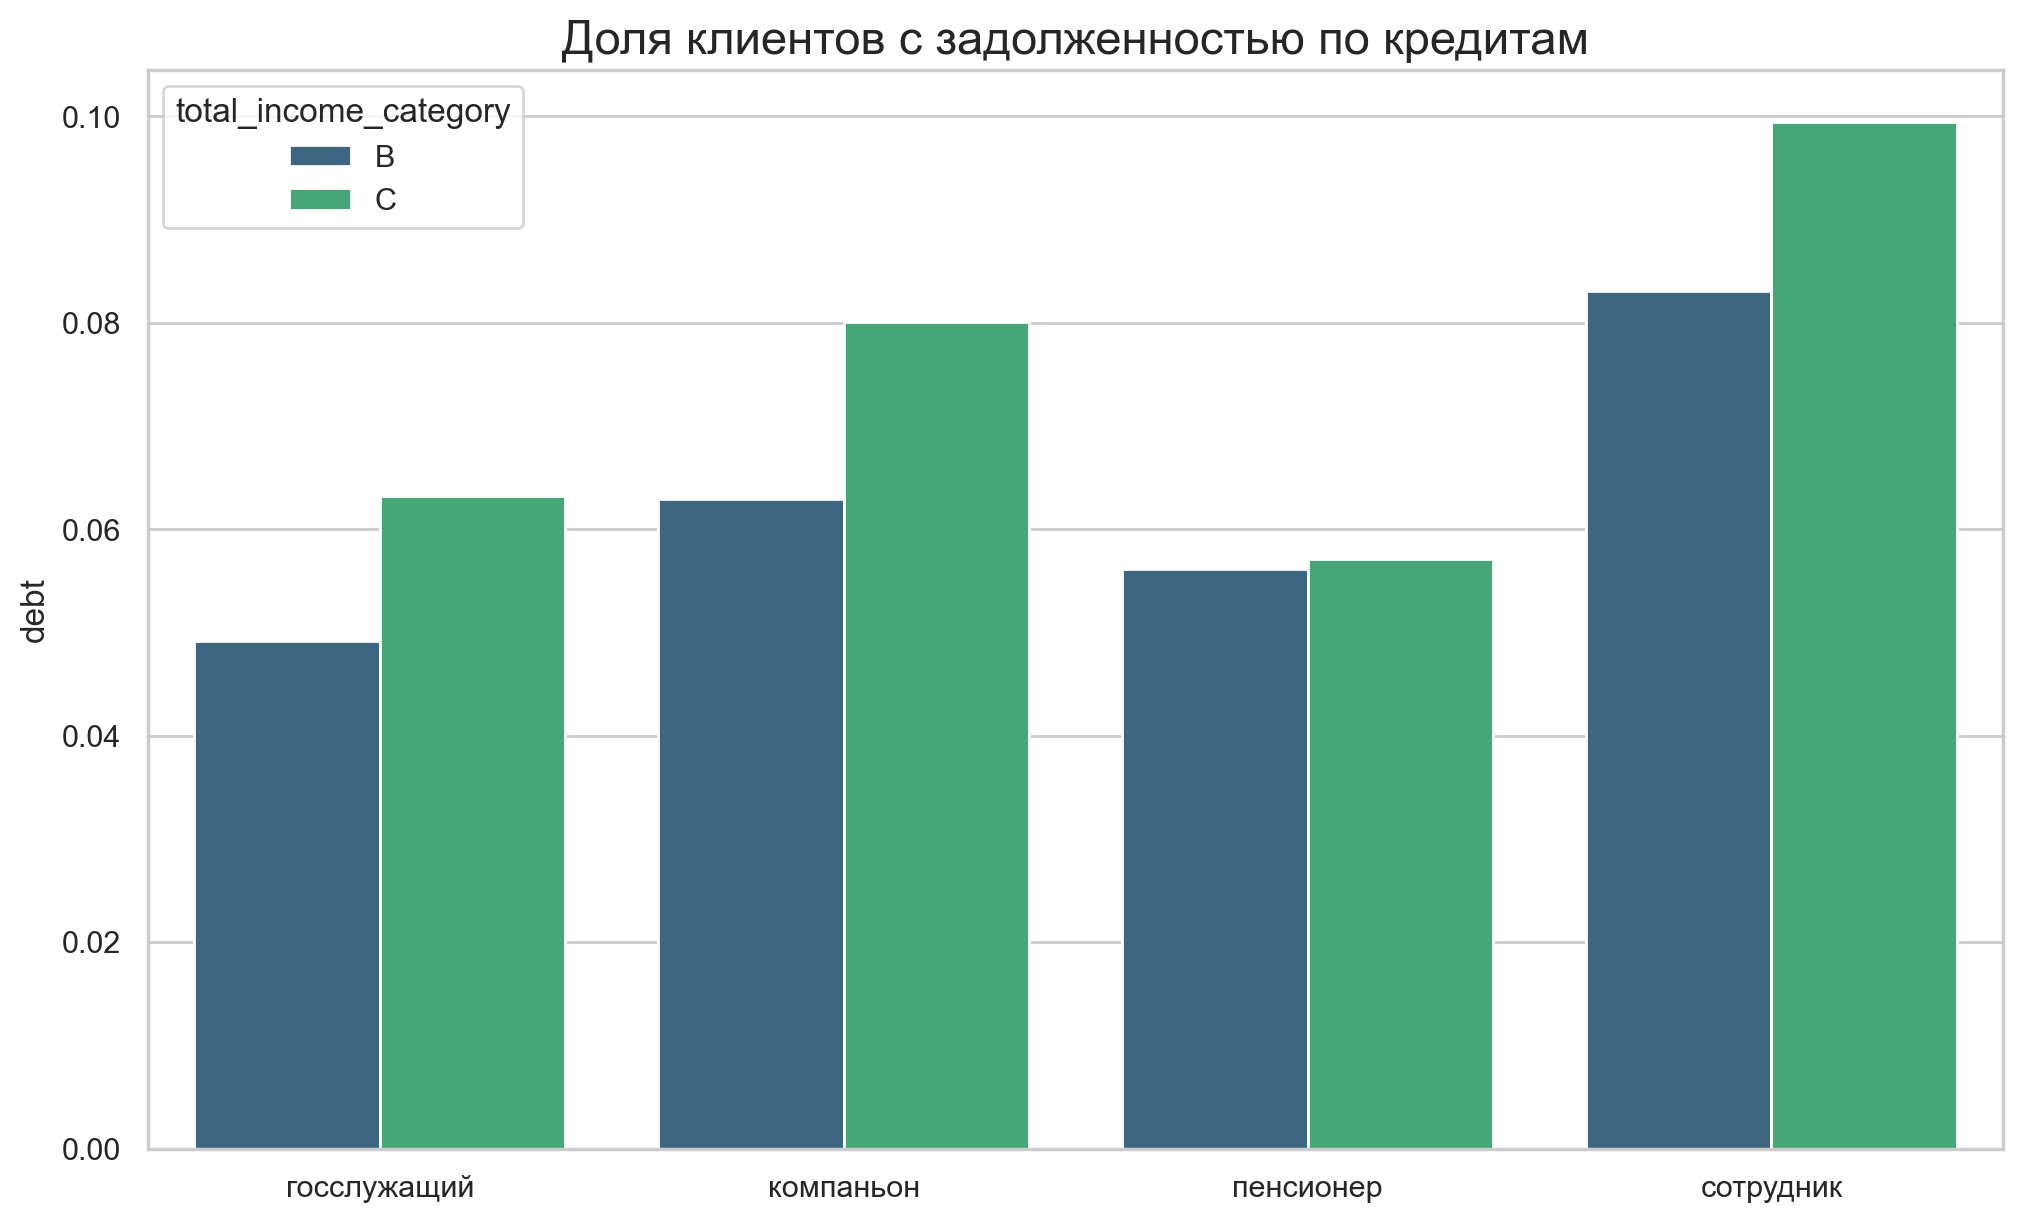

In [33]:
income_type_data = income_type_data.query('income_type not in ["предприниматель", "безработный", "в декрете", "студент"]')
# получение среза данных
fg = plt.figure(figsize=(10,6), constrained_layout=True)
sns.barplot(x=income_type_data['income_type'], y=income_type_data['debt'], hue=income_type_data['total_income_category'], palette='viridis')
plt.xlabel(None)
plt.title('Доля клиентов с задолженностью по кредитам', fontsize=17)
# построение столбчатой диаграммы

**Вывод:** 

Самыми надёжными заёмщиками являются **пенсионеры и госслужащие** на любом уровне доходов, в то время как сотрудники выплачивают свои кредиты хуже остальных.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [34]:
purpose_data = data.pivot_table(index='purpose_category', values='debt', aggfunc=['count', 'sum', 'mean'])
# создание сводной таблицы методом pivot_table()
purpose_data = purpose_data.round(3)
# округление количественных переменных в таблице purpose_data
purpose_data

,count,sum,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4279,400,0.093
операции с недвижимостью,10751,780,0.073
получение образования,3988,369,0.093
проведение свадьбы,2313,183,0.079


Text(0.5, 1.0, 'Доля клиентов с задолженностью по кредитам')

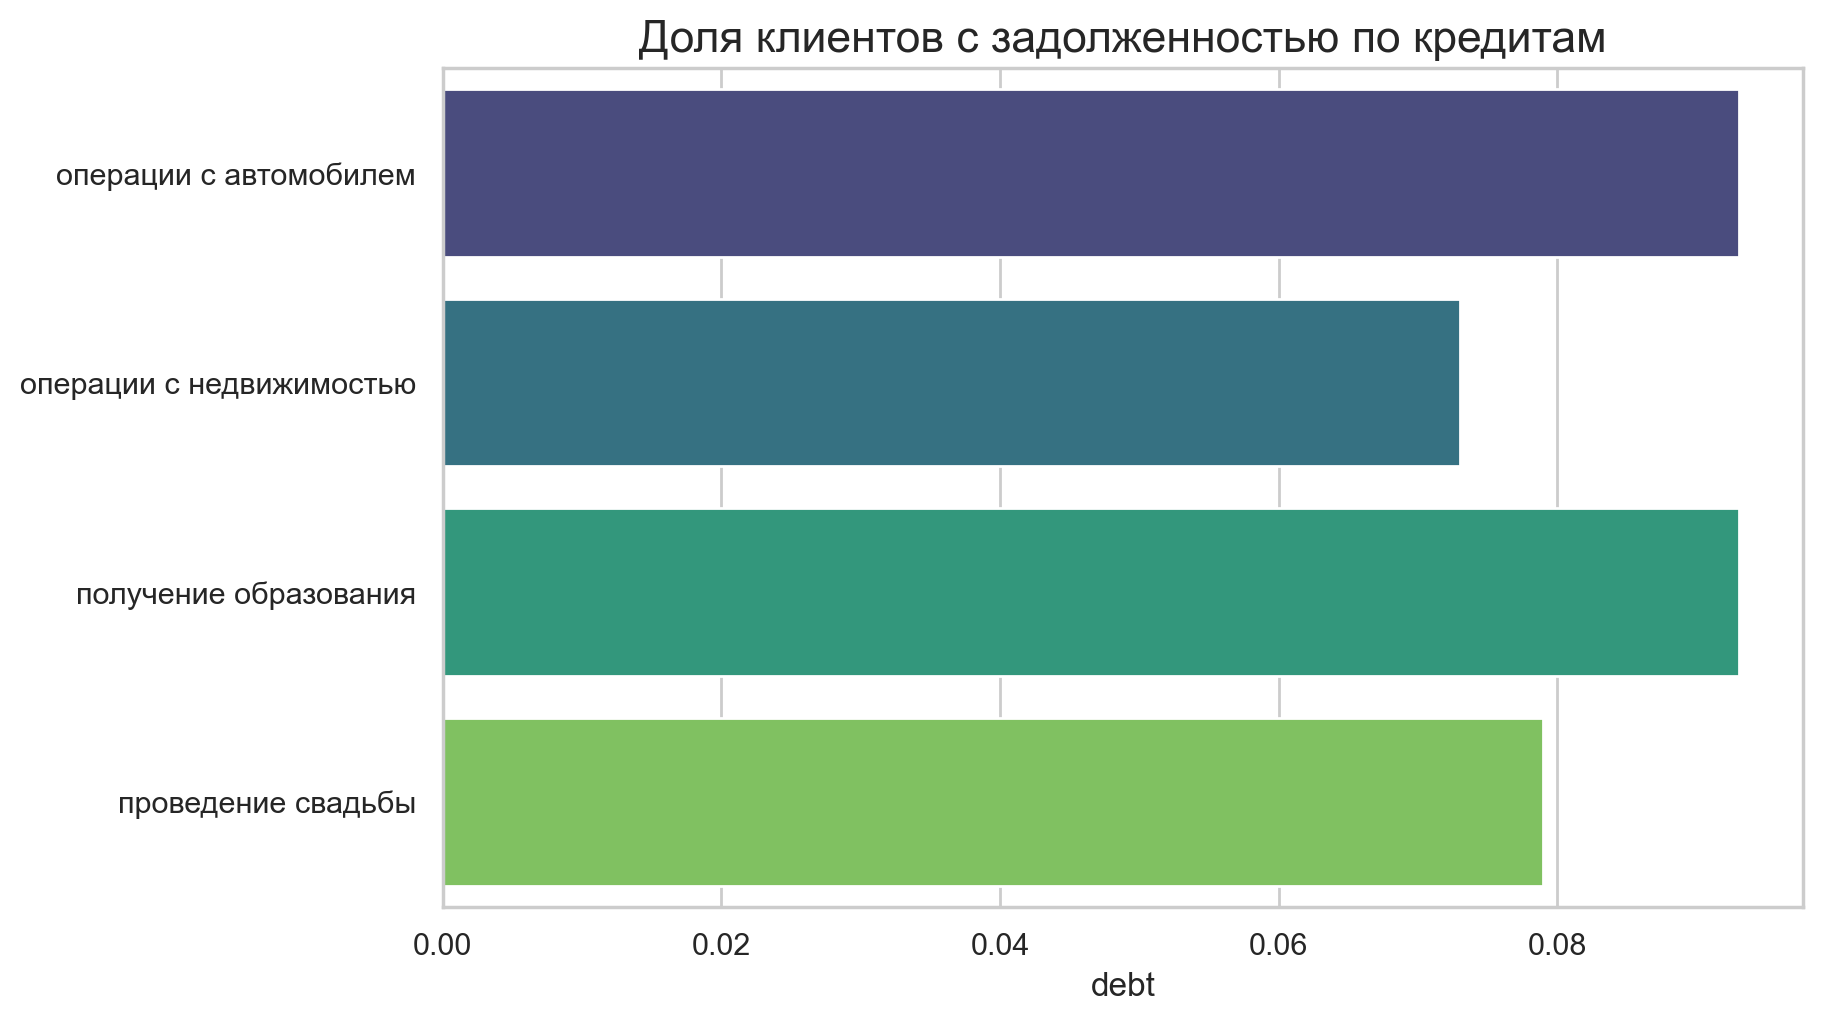

In [35]:
fg = plt.figure(figsize=(9,5), constrained_layout=True)
sns.barplot(y=purpose_data.index, x=purpose_data['mean']['debt'], palette='viridis', orient='h')
plt.ylabel(None)
plt.title('Доля клиентов с задолженностью по кредитам', fontsize=16)
# построение столбчатой диаграммы

**Вывод:** 

У людей, которые берут кредит на получение образования или покупку автомобиля, есть больше задолженностей по кредитам, чем у клиентов, оформляющих кредит ради совершения **операций с недвижимостью**, а также **проведения свадьбы**. Предположительно, молодые клиенты банка, целью которых является получение образования, первоначально имеют меньше возможностей для выплат по кредитам в отличие от людей с трудовым опытом и стабильной зарплатой. В то же время покупкой коммерческой или жилой недвижимости чаще интересуются семьи, ответственно подходящие к погашению кредитов в срок.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

Возможные **причины** появления пропусков в данных:
- технические, например, неудачно написанный код для загрузки данных с сервера;
- личные цели клиентов банка, которые умышленно оставили пропуски при заполнении анкеты.

Ежемесячные доходы заёмщика и трудовой стаж - очень важные параметры, учитываемые при оценке его платёжеспособности и стабильности финансовых потоков. На практике многие банки имеют возможность запросить недостающие сведения из государственных баз данных, например: Пенсионного фонда, Федеральной налоговой службы, Росреестра и др.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Так как `days_employed` и `total_income` являются количественными переменными, то лучше всего для устранения пропусков подходят среднее арифметическое или медиана. С учётом того, что в данных присутствуют выбросы, корректнее использовать медиану. Сдеднее арифметическое больше подвержно влиянию выбросов, чем медианное значение.

### Шаг 4: общий вывод.

Риск неуплаты кредита ниже у клиентов банка, которые **не имеют детей** на иждевении и соответственно могут выделить больше средств для погашения кредита. Заёмщики, находящиеся **в официальном браке**, также более ответственно подходят к планированию бюджета и чаще не имеют задолженностей по выплатам, в отличие от не женатых/не замужних людей. Немного должников и среди клиентов **в разводе (7.1%)**, а также **вдов/вдовцов (6.5%)**.

Клиенты банка с ежемесячным доходом **от 200001 до 1000000 руб. (категория 'B')** реже становятся должниками по кредитам, чем заёмщики из категории 'C' c заработком от 50001 до 200000 руб. При этом *информации по остальным категориям дохода недостаточно* для оценки данной взаимосвязи. Стоит отметить, что **пенсионеры и госслужащие** выплачивают кредиты лучше компаньонов и сотрудников.  

Доля должников, оформляющих кредит для совершения **операций с недвижимостью (7.3%) и проведения свадьбы (7.9%)**, меньше по сравнению с клиентами, которые берут кредит **на получнение образования (9.3%) и покупку автомобиля (9.3%)**. Покупкой недвижимости больше интересуются семьи, планирующие свои расходы заранее, в то время как молодые люди без стабильного заработка чаще заинтересованы в получении образования.  